In [1]:
# import required libraries

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load and view data

df =pd.read_csv('alldata.csv')
df.head()

,position,company,description,reviews,location
0,Development Director,ALS TDI,Development Director\nALS Therapy Development ...,NaN,"Atlanta, GA 30301"
1,An Ostentatiously-Excitable Principal Research...,The Hexagon Lavish,"Job Description\n\n""The road that leads to acc...",NaN,"Atlanta, GA"
2,Data Scientist,Xpert Staffing,"Growing company located in the Atlanta, GA are...",NaN,"Atlanta, GA"
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA 30303"
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA"


In [3]:
# get the information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6964 entries, 0 to 6963
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   position     6953 non-null   object 
 1   company      6953 non-null   object 
 2   description  6953 non-null   object 
 3   reviews      5326 non-null   float64
 4   location     6953 non-null   object 
dtypes: float64(1), object(4)
memory usage: 272.2+ KB


In [4]:
# showing the basic description of dataset

df.describe()

,reviews
count,5326.000000
mean,3179.089185
std,8448.515056
min,2.000000
25%,27.000000
50%,230.000000
75%,1578.000000
max,148114.000000


In [5]:
# Having quick data analysis

ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# removing the duplicates from the dataset
df.drop_duplicates(inplace= True)

# removing the rows which has NAN values
df.dropna(inplace= True)

# filling NAN with 0
df['reviews'].fillna(0, inplace= True)

In [7]:
# checking duplicates after removing it

df.duplicated().sum()

0

In [8]:
# checking null values after data cleaning

df.isnull().sum()

position       0
company        0
description    0
reviews        0
location       0
dtype: int64

In [9]:
# Create city and state columns to aggregate the data better

df['location'] = df.location.apply(lambda x: re.sub('\d*','',str(x)))
df['city'] = df.location.apply(lambda x: x.split(',')[0].strip())
df['state'] = df.location.apply(lambda x: x.split(',')[1].strip() if ',' in x else '')
df['location'] = df['city']+ ', ' + df['state']
df.head()

,position,company,description,reviews,location,city,state
3,Data Analyst,Operation HOPE,DEPARTMENT: Program OperationsPOSITION LOCATIO...,44.0,"Atlanta, GA",Atlanta,GA
4,Assistant Professor -TT - Signal Processing & ...,Emory University,DESCRIPTION\nThe Emory University Department o...,550.0,"Atlanta, GA",Atlanta,GA
5,Manager of Data Engineering,McKinsey & Company,Qualifications\nBachelor’s degree in Computer ...,385.0,"Atlanta, GA",Atlanta,GA
6,"Product Specialist - Periscope, New Ventures",McKinsey & Company,Qualifications\nBachelor’s degree\n5-7 years o...,385.0,"Atlanta, GA",Atlanta,GA
7,"Junior to Mid-level Engineer, Geologist or Env...",Wood,Overview / Responsibilities\nWood Environment ...,899.0,"Atlanta, GA",Atlanta,GA


In [10]:
# Group position name into 5 types

df_c =df.copy()

df_c['position']=[x.upper() for x in df_c['position']]

df_c.loc[df_c.position.str.contains("SCIENTIST"), 'position'] = 'Data Scientist'

df_c.loc[df_c.position.str.contains('ENGINEER'),'position']='Machine Learning Engineer'
df_c.loc[df_c.position.str.contains('PRINCIPAL STATISTICAL PROGRAMMER'),'position']='Machine Learning Engineer'
df_c.loc[df_c.position.str.contains('PROGRAMMER'),'position']='Machine Learning Engineer'
df_c.loc[df_c.position.str.contains('DEVELOPER'),'position']='Machine Learning Engineer'

df_c.loc[df_c.position.str.contains('ANALYST'), 'position'] = 'Data Analyst'
df_c.loc[df_c.position.str.contains('STATISTICIAN'), 'position'] = 'Data Analyst'

df_c.loc[df_c.position.str.contains('MANAGER'),'position']='Data Science Manager'
df_c.loc[df_c.position.str.contains('CONSULTANT'),'position']='Data Science Manager'
df_c.loc[df_c.position.str.contains('DATA SCIENCE'),'position']='Data Science Manager'
df_c.loc[df_c.position.str.contains('DIRECTOR'),'position']='Data Science Manager'

position_map = {
    'Data Scientist': 'Data Scientist',
    'Data Analyst': 'Data Analyst',
    'Machine Learning Engineer': 'Machine Learning Engineer', 
    'Data Science Manager': 'Data Science Manager'
}

df_c['position'] = df_c['position'].map(position_map).fillna('Others')

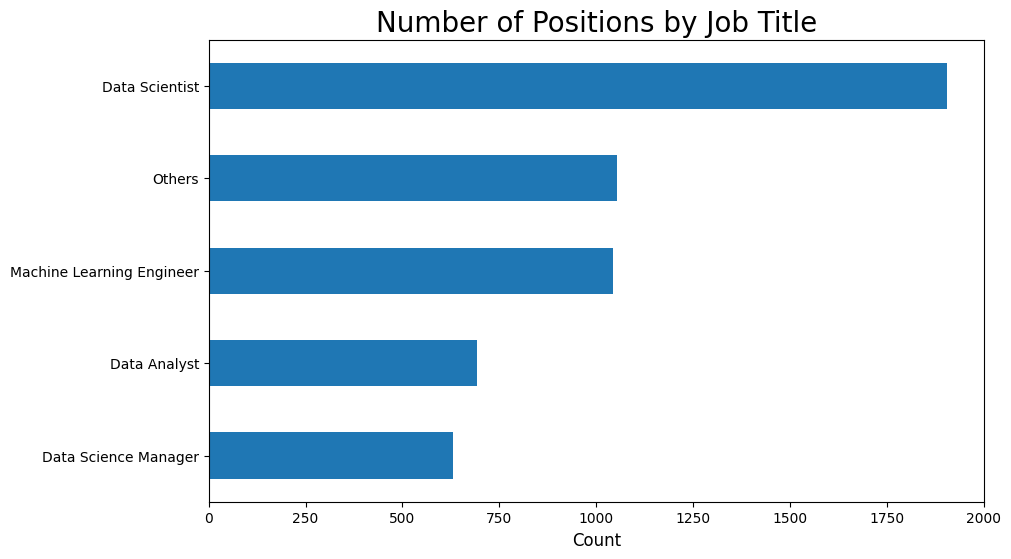

In [11]:
# Positions by Job Title 

title = df_c.groupby(['position']).count().sort_values('company')

title['company'].plot(kind='barh',figsize = (10,6))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Job Title', size = 20)
plt.show()


From the chart, we can know that 'Data Scientist' role has moe opportunities among the other roles.

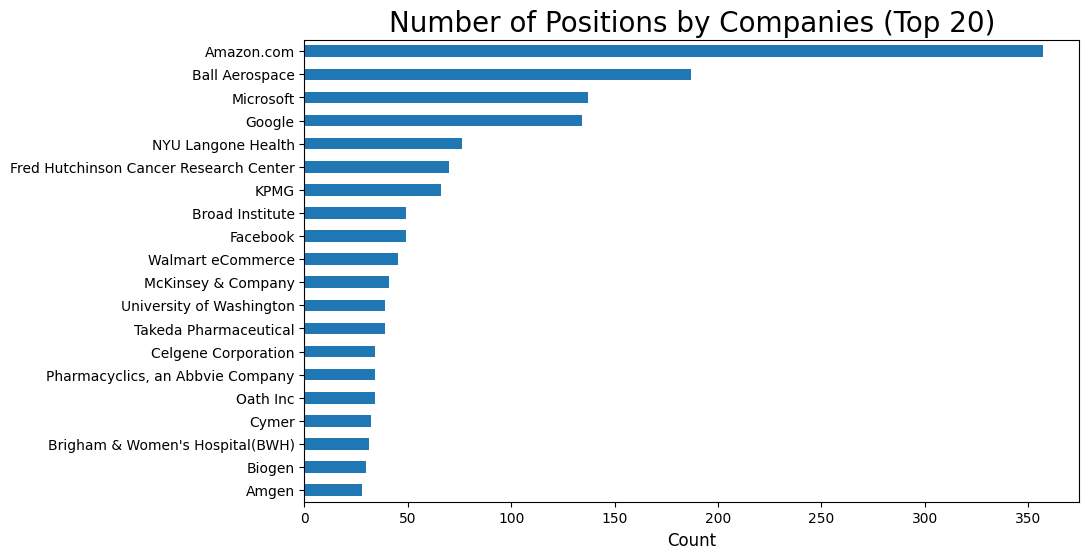

In [12]:
# Positions by Companies 

company = df_c.groupby(['company']).count().sort_values('position').tail(20)

company['position'].plot(kind='barh',figsize = (10,6))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Companies (Top 20)', size = 20)
plt.show()

From the chart, we can see that 'Amazon.com' hire the most candidate, follow by 'Ball Aerospace',  'Microsoft'  and  'Google'.

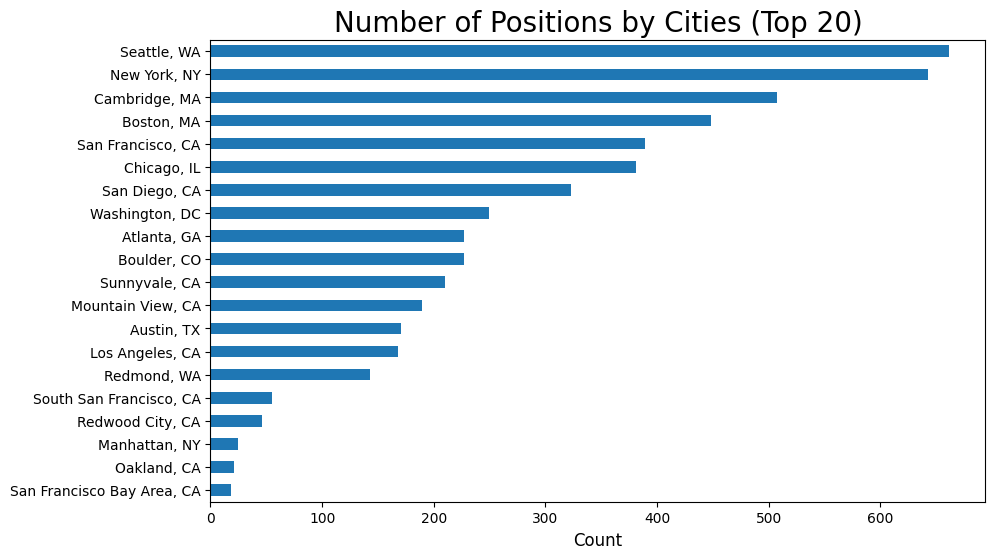

In [13]:
# Positions by location 

city = df_c.groupby(['location']).count().sort_values('position').tail(20)

city['position'].plot(kind='barh',figsize = (10,6))
plt.xlabel('Count', size = 12)
plt.ylabel('')
plt.yticks(size = 10)
plt.xticks(size = 10)
plt.title('Number of Positions by Cities (Top 20)', size = 20)
plt.show()

It appears that the top 5 cities that hire the most data science related job are 'Seattle', 'New York', 'Cambridge', 'Boston', and 'San Francisco'.

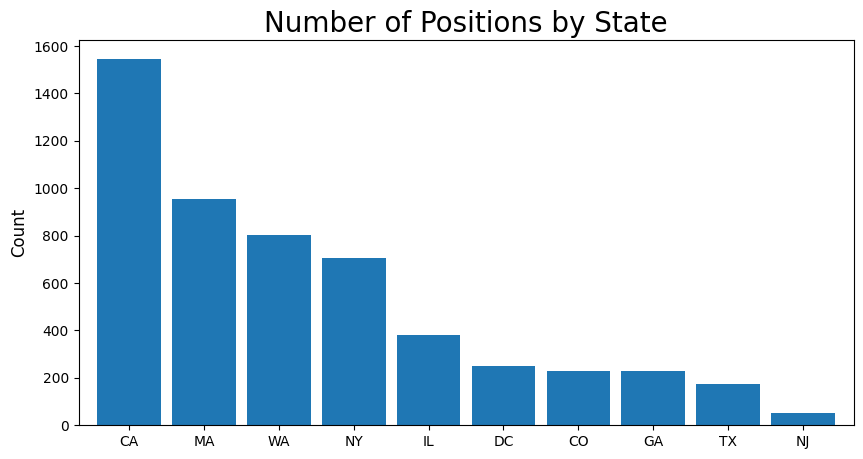

In [14]:
# Positions by state

state = df_c.groupby('state').count().sort_values('position',ascending = False)

state['position'].plot(kind = 'bar',figsize = (10,5) ,width = 0.85)
plt.xlabel('')
plt.ylabel('Count',size = 12)
plt.title('Number of Positions by State', size = 20)
plt.yticks(size = 10)
plt.xticks(size = 10, rotation = 720)
plt.show()

From the above chart, 'California' state has more job opportunities related to Data Science among other states.